In [8]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
sns.set_style('ticks')
sns.set_context('talk')
import warnings; warnings.simplefilter('ignore')

In [11]:
data_dir = '/home/julia/data/ict/'

# Odor response

### Align processed photometry data to odor

In [5]:
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']

df_all_odor = pd.DataFrame(index=np.arange(-5000, 15000))

for m in mice:
    
    df_mouse = pd.read_pickle(data_dir+"mice/{}_corr_dFF0.pkl".format(m)).filter(['odor_start', 'gpmt_corr'])
    ts_odor = []
    
    for row in range(len(df_mouse)):
        ts = df_mouse.iloc[row]['gpmt_corr']
        zero_idx = df_mouse.iloc[row]['odor_start'] 
        ts_odor.append(pd.Series(name="{}_{}".format(m,row), data=ts,
                                index=np.arange(-zero_idx, -zero_idx+ts.shape[0])))
    df_odor = pd.DataFrame(index=np.arange(-5000, 15000))        
    df_odor = df_odor.join(ts_odor, how='left')
    np.save(data_dir+"odor_aligned/{}_gpmt_corr_dFF0.npy".format(m), np.asarray(df_odor))

    df_all_odor = df_all_odor.join(df_odor, how='left')

np.save(data_dir+"odor_aligned/all_gpmt_corr_dFF0.npy", np.asarray(df_all_odor))

### Plot odor aligned response per mouse

In [12]:
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
types = ['nogo', 'wait', 'go']
performances = [0,1]

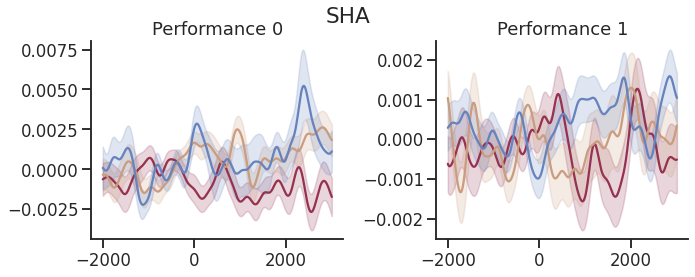

In [35]:
mouse = 'SHA'

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))
days = [-3,-2,1,0]

fig, ax = plt.subplots(1,2, figsize=(10,4))
for p in performances:
    for c in range(len(types)):
        idcs = df[(df['type']==types[c]) & 
                  (df['performance']==p) & 
                  (df['day'].isin(days))].index

        x = np.arange(-2000, 3000)
        y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
        sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

        ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
        ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
        ax[p].set_title('Performance {}'.format(p))
        sns.despine()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

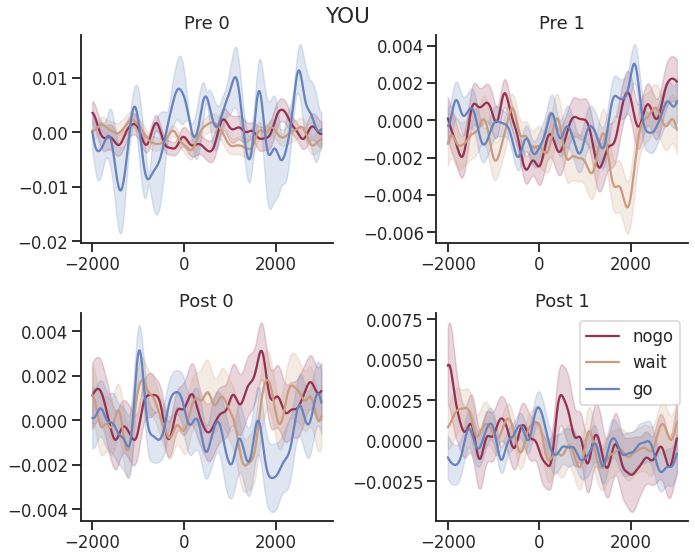

In [38]:
mouse = 'YOU'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
            sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

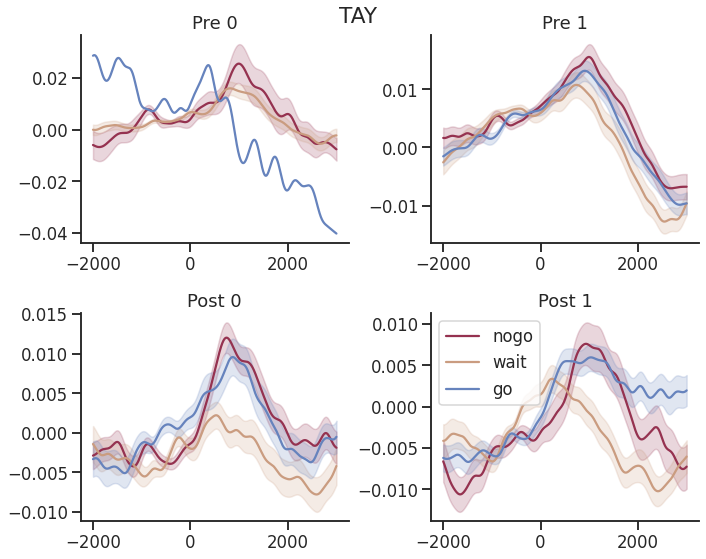

In [36]:
mouse = 'TAY'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
            sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

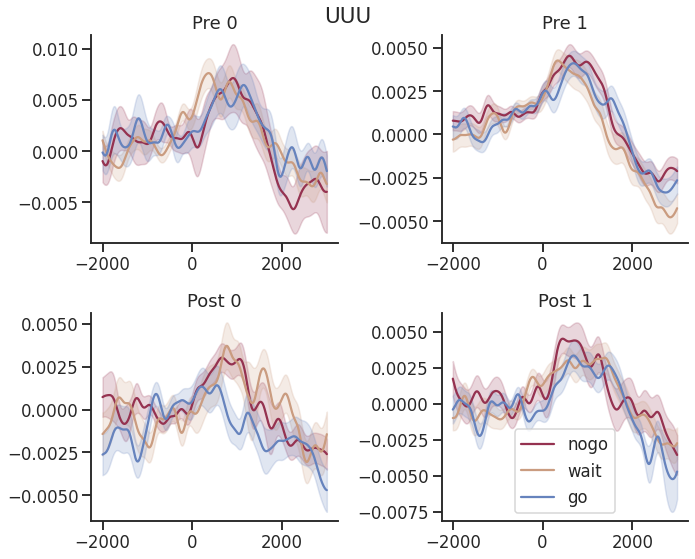

In [37]:
mouse = 'UUU'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
            sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

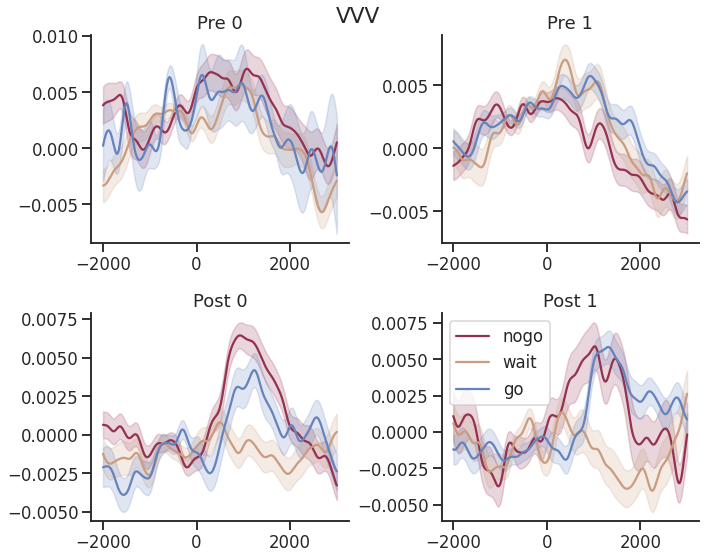

In [39]:
mouse = 'VVV'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
            sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

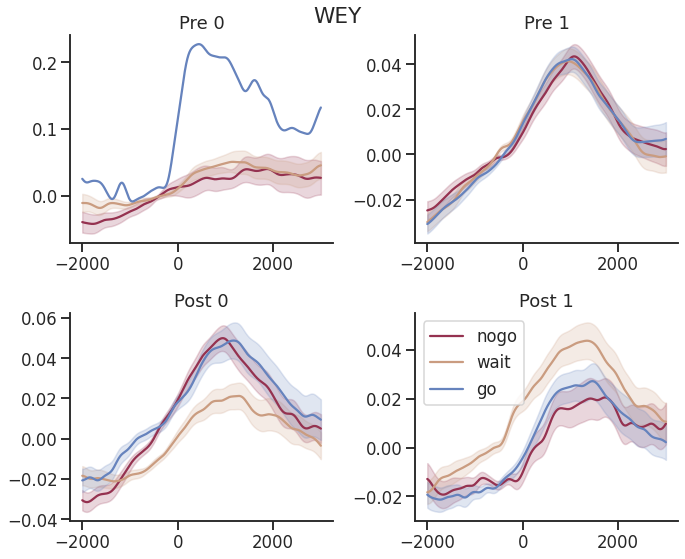

In [40]:
mouse = 'WEY'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:8000]
            sem = stats.sem(gpmt[:,idcs][3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

## Average across all mice

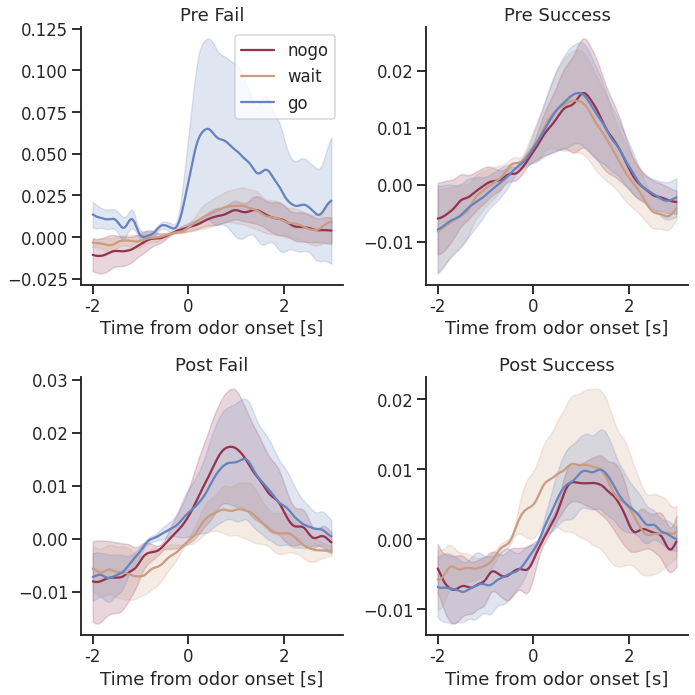

In [41]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
days = [range(-3,0), range(0,3)]
periods = ['Pre', 'Post']
perfs = ['Fail', 'Success']

for d in range(len(days)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((20000, len(mice)))
            for m in range(len(mice)):
                df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mice[m])).reset_index(drop=True)
                gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mice[m]))
                
                idcs = df[(df['type']==types[c]) & 
                          (df['performance']==p) & 
                          (df['day'].isin(days[d]))].index

                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[3000:8000], axis=1)
            sem = stats.sem(L[3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from odor onset [s]')
            ax[d,p].set_title('{} {}'.format(periods[d], perfs[p]))
            sns.despine()

ax[0,0].legend()
plt.tight_layout()

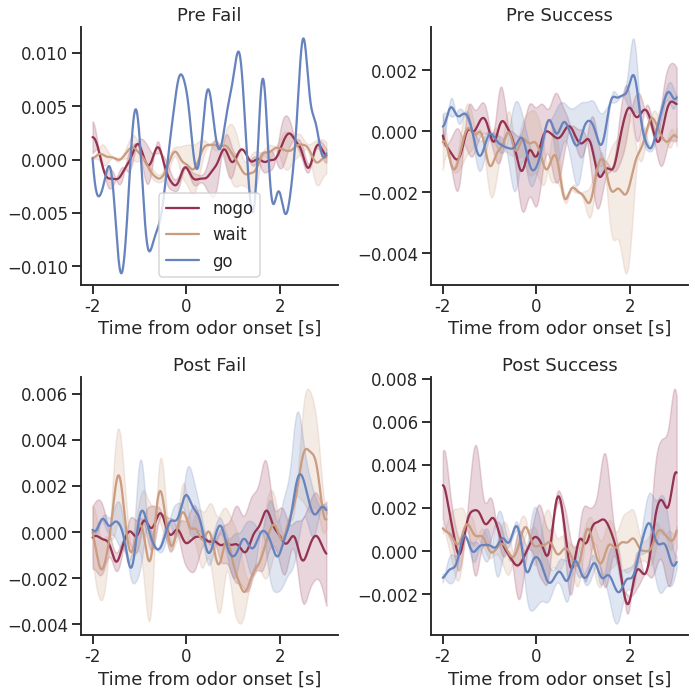

In [42]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['SHA', 'YOU']
days = [range(-3,0), range(0,3)]
periods = ['Pre', 'Post']
perfs = ['Fail', 'Success']

for d in range(len(days)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((20000, len(mice)))
            for m in range(len(mice)):
                df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mice[m])).reset_index(drop=True)
                gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(mice[m]))
                
                idcs = df[(df['type']==types[c]) & 
                          (df['performance']==p) & 
                          (df['day'].isin(days[d]))].index

                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[3000:8000], axis=1)
            sem = stats.sem(L[3000:8000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from odor onset [s]')
            ax[d,p].set_title('{} {}'.format(periods[d], perfs[p]))
            sns.despine()

ax[0,0].legend()
plt.tight_layout()

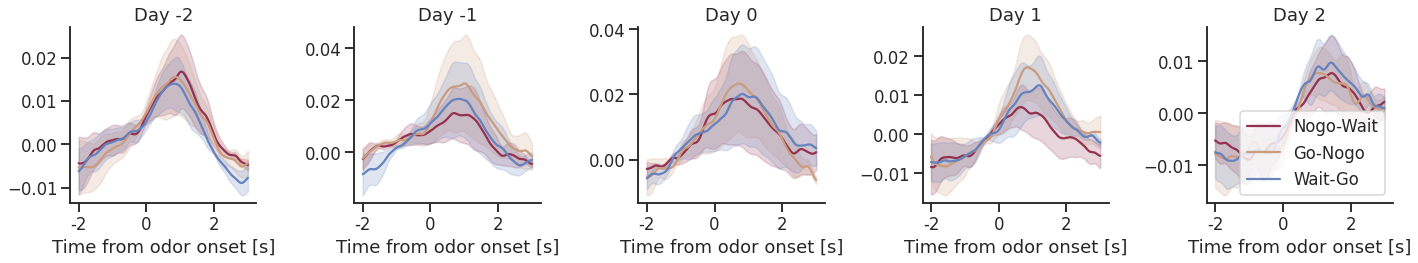

In [23]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
days = [-2,-1,0,1,2]
odors = [1,2,3]
odor_id = ['Nogo-Wait', 'Go-Nogo', 'Wait-Go']

for d in range(len(days)):
    for o in range(len(odors)):
        L = np.zeros((20000, len(mice)))
        for m in range(len(mice)):
            df = pd.read_pickle(data_dir+"mice/{}_corr_dFF0.pkl".format(mice[m])).reset_index(drop=True)
            gpmt = np.load(data_dir+"odor_aligned/{}_gpmt_corr_dFF0.npy".format(mice[m]))

            idcs = df[(df['odor']==odors[o]) & 
                      (df['day']==days[d])].index

            L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

        x = np.arange(-2000, 3000)
        y = np.nanmean(L[3000:8000], axis=1)
        sem = stats.sem(L[3000:8000], axis=1, nan_policy='omit')

        ax[d].plot(x, y, color=colors[o], label="{}".format(odor_id[o]))
        ax[d].fill_between(x, (y-sem), (y+sem), color=colors[o], alpha=.2)
        ax[d].set_xticks([-2000, 0, 2000])
        ax[d].set_xticklabels([-2,0,2])
        ax[d].set_xlabel('Time from odor onset [s]')
        ax[d].set_title('Day {}'.format(days[d]))
        sns.despine()
ax[d].legend()
plt.tight_layout()
plt.savefig(data_dir+'figs/CS_dFF0.svg')

# US response

### Align processed data to ITI

In [6]:
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']

df_all_iti = pd.DataFrame(index=np.arange(-10000, 10000))

for m in mice:
    df_mouse = pd.read_pickle(data_dir+"mice/{}_corr_dFF0.pkl".format(m)).filter(['iti_start', 'gpmt_corr'])
    ts_iti = []
    
    for row in range(len(df_mouse)):
        ts = df_mouse.iloc[row]['gpmt_corr']
        zero_idx = df_mouse.iloc[row]['iti_start']
        ts_iti.append(pd.Series(name="{}_{}".format(m,row), data=ts,
                                index=np.arange(-zero_idx, -zero_idx+ts.shape[0])))
    df_iti = pd.DataFrame(index=np.arange(-10000, 10000))        
    df_iti = df_iti.join(ts_iti, how='left')
    np.save("/home/julia/data/ict/iti_aligned/{}_gpmt_corr_dFF0.npy".format(m), np.asarray(df_iti))

    df_all_iti = df_all_iti.join(df_iti, how='left')
np.save("/home/julia/data/ict/iti_aligned/all_gpmt_corr_dFF0.npy", np.asarray(df_all_iti))

In [8]:
types = ['nogo', 'wait', 'go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
performances = [0,1]

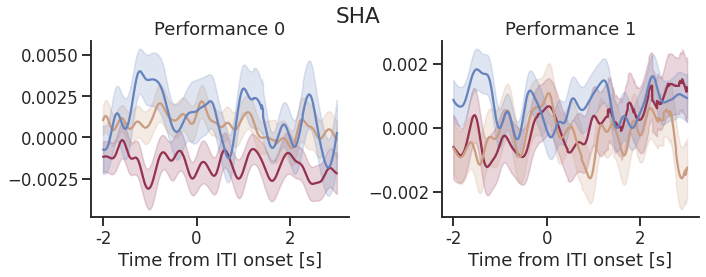

In [10]:
mouse = 'SHA'

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))
days = [-3,-2,1,0]

fig, ax = plt.subplots(1,2, figsize=(10,4))
for p in performances:
    for c in range(len(types)):
        idcs = df[(df['type']==types[c]) & 
                  (df['performance']==p) & 
                  (df['day'].isin(days))].index

        x = np.arange(-2000, 3000)
        y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
        sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

        ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
        ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
        ax[p].set_title('Performance {}'.format(p))
        ax[p].set_xticks([-2000, 0, 2000])
        ax[p].set_xticklabels([-2,0,2])
        ax[p].set_xlabel('Time from ITI onset [s]')
        sns.despine()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

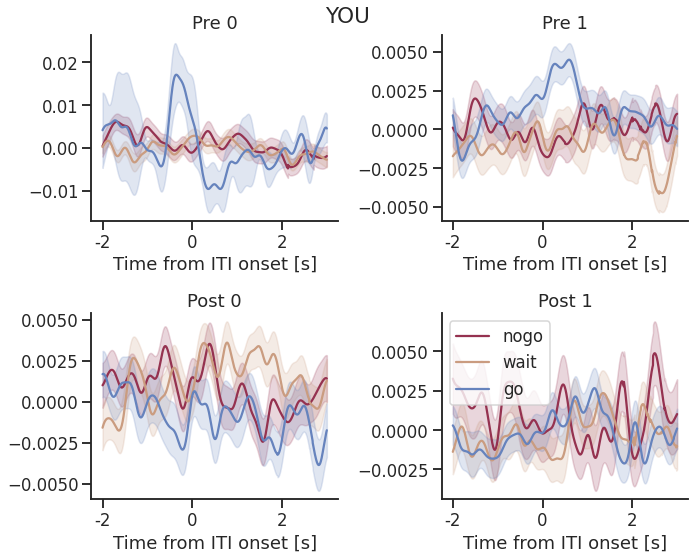

In [12]:
mouse = 'YOU'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
            sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

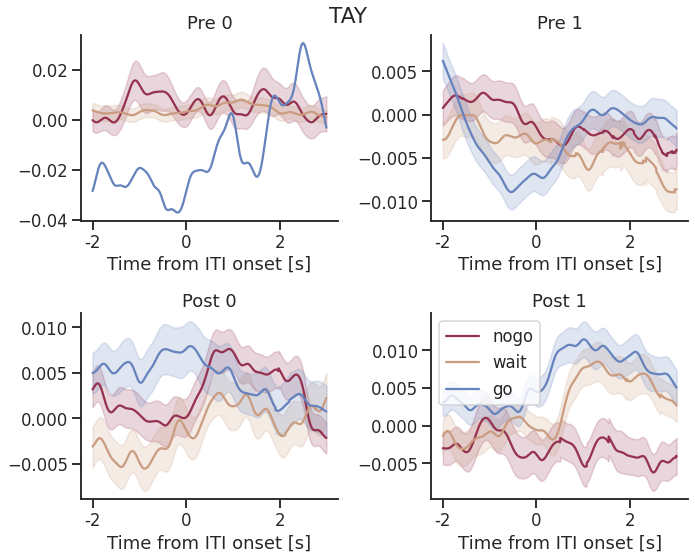

In [13]:
mouse = 'TAY'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
            sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

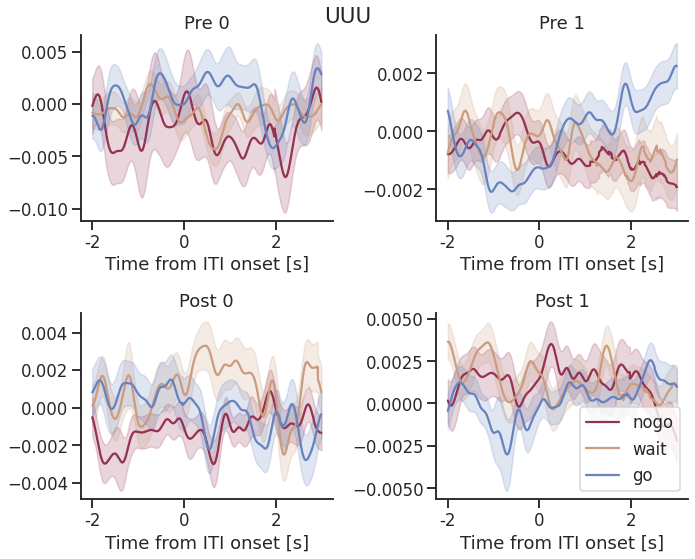

In [14]:
mouse = 'UUU'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
            sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

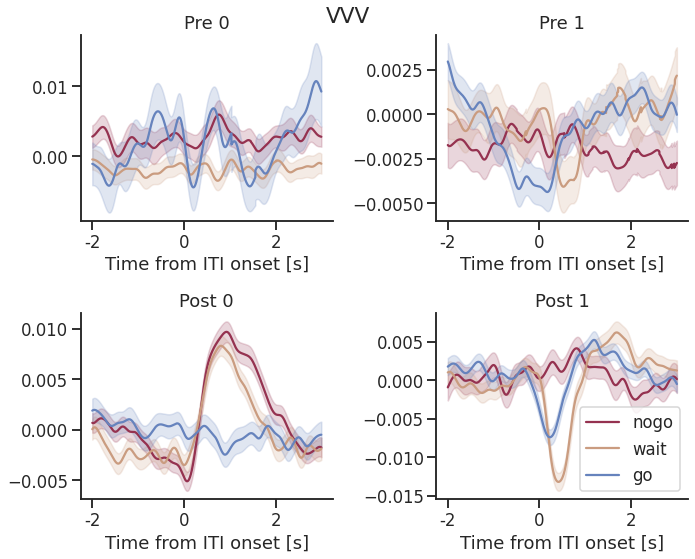

In [17]:
mouse = 'VVV'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
            sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

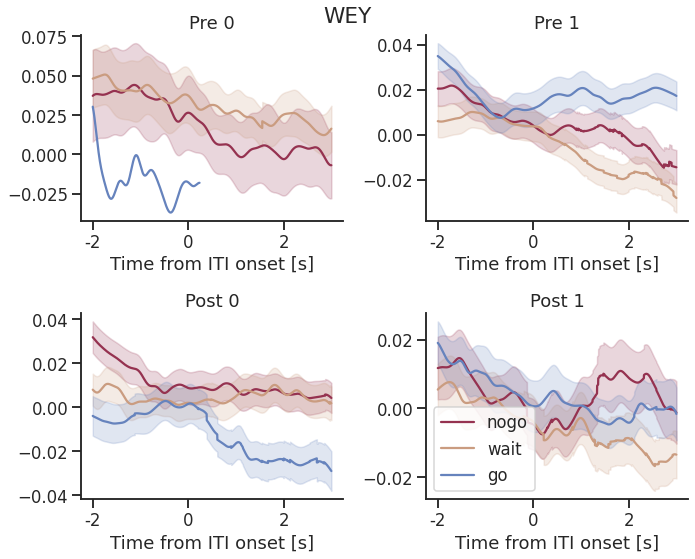

In [16]:
mouse = 'WEY'
days = [range(-3,0), range(0,3)]
period = ['Pre', 'Post']

df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mouse)).reset_index(drop=True)
gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mouse))

fig, ax = plt.subplots(2,2, figsize=(10,8))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & 
                      (df['performance']==p) & 
                      (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 3000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[8000:13000]
            sem = stats.sem(gpmt[:,idcs][8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

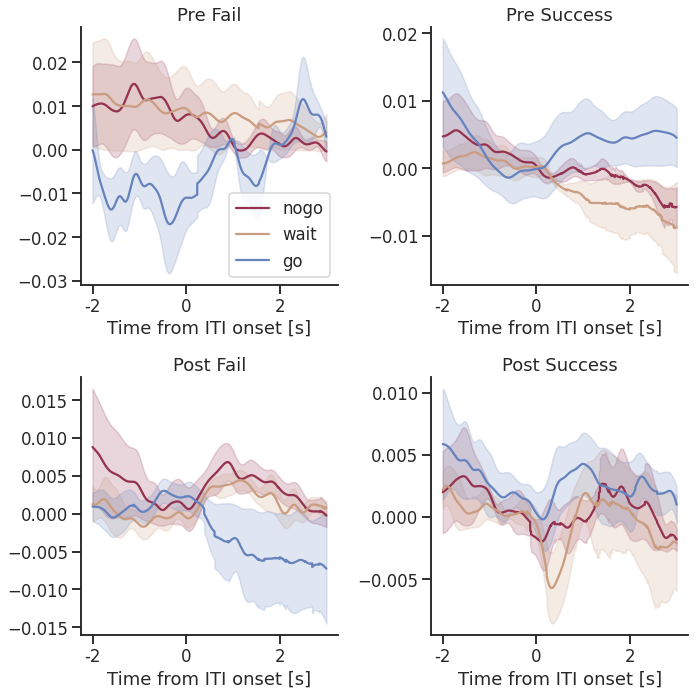

In [18]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
days = [range(-3,0), range(0,3)]
periods = ['Pre', 'Post']
perfs = ['Fail', 'Success']

for d in range(len(days)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((20000, len(mice)))
            for m in range(len(mice)):
                df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mice[m])).reset_index(drop=True)
                gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mice[m]))
                
                idcs = df[(df['type']==types[c]) & 
                          (df['performance']==p) & 
                          (df['day'].isin(days[d]))].index

                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[8000:13000], axis=1)
            sem = stats.sem(L[8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            ax[d,p].set_title('{} {}'.format(periods[d], perfs[p]))
            sns.despine()

ax[0,0].legend()
plt.tight_layout()

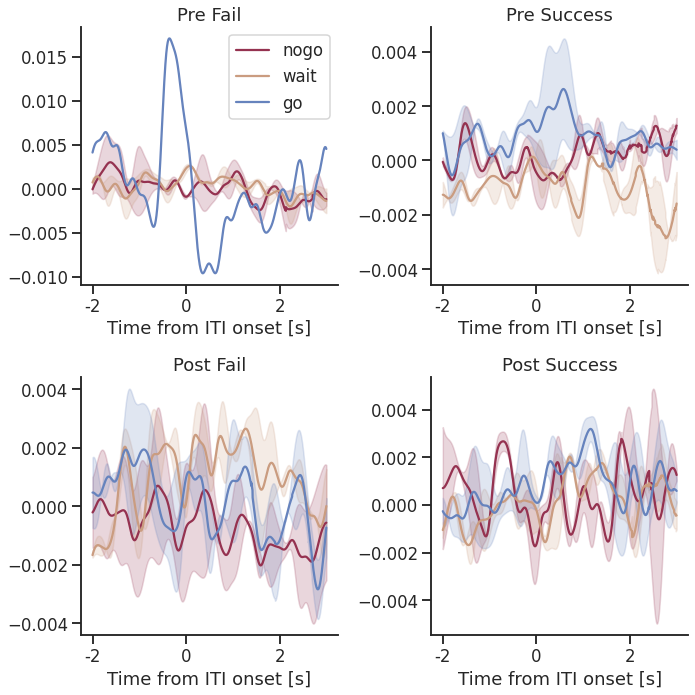

In [19]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
mice = ['YOU', 'SHA']
days = [range(-3,0), range(0,3)]
periods = ['Pre', 'Post']
perfs = ['Fail', 'Success']

for d in range(len(days)):
    for c in range(len(types)):
        for p in performances:
            L = np.zeros((20000, len(mice)))
            for m in range(len(mice)):
                df = pd.read_pickle(data_dir+"mice/{}_corr.pkl".format(mice[m])).reset_index(drop=True)
                gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr.npy".format(mice[m]))
                
                idcs = df[(df['type']==types[c]) & 
                          (df['performance']==p) & 
                          (df['day'].isin(days[d]))].index

                L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

            x = np.arange(-2000, 3000)
            y = np.nanmean(L[8000:13000], axis=1)
            sem = stats.sem(L[8000:13000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_xticks([-2000, 0, 2000])
            ax[d,p].set_xticklabels([-2,0,2])
            ax[d,p].set_xlabel('Time from ITI onset [s]')
            ax[d,p].set_title('{} {}'.format(periods[d], perfs[p]))
            sns.despine()

ax[0,0].legend()
plt.tight_layout()

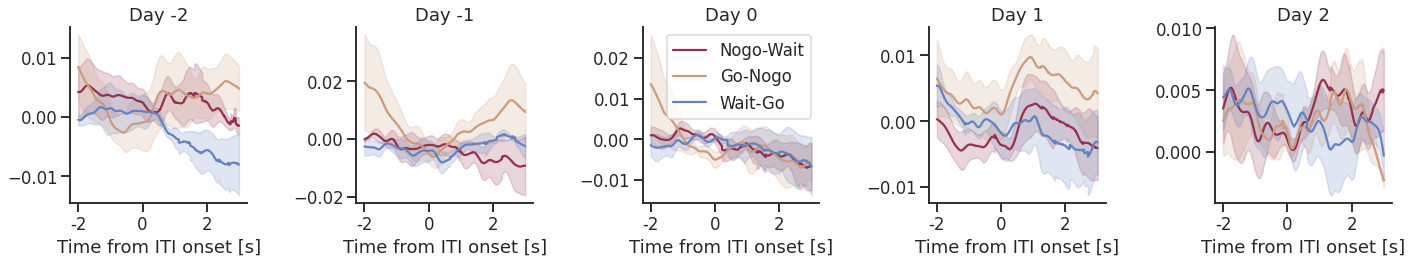

In [22]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
days = [-2,-1,0,1,2]
odors = [1,2,3]
odor_id = ['Nogo-Wait', 'Go-Nogo', 'Wait-Go']

for d in range(len(days)):
    for o in range(len(odors)):
        L = np.zeros((20000, len(mice)))
        for m in range(len(mice)):
            df = pd.read_pickle(data_dir+"mice/{}_corr_dFF0.pkl".format(mice[m])).reset_index(drop=True)
            gpmt = np.load(data_dir+"iti_aligned/{}_gpmt_corr_dFF0.npy".format(mice[m]))

            idcs = df[(df['odor']==odors[o]) & 
                      (df['day']==days[d])].index

            L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

        x = np.arange(-2000, 3000)
        y = np.nanmean(L[8000:13000], axis=1)
        sem = stats.sem(L[8000:13000], axis=1, nan_policy='omit')

        ax[d].plot(x, y, color=colors[o], label="{}".format(odor_id[o]))
        ax[d].fill_between(x, (y-sem), (y+sem), color=colors[o], alpha=.2)
        ax[d].set_xticks([-2000, 0, 2000])
        ax[d].set_xticklabels([-2,0,2])
        ax[d].set_xlabel('Time from ITI onset [s]')
        ax[d].set_title('Day {}'.format(days[d]))
        sns.despine()
ax[2].legend()
plt.tight_layout()
plt.savefig(data_dir+'figs/US_dFF0.svg')